# Predicting Heart Disease Using Machine Learning

This notebook looks into various python based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not  someone has heart disease based on their medical attribute

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can it be predicted whether or not they have heart disease?

## 2. Data

The original data comes from the Cleveland data from the UCI Machine Learning Repository.
https://archive.ics.uci.edu/ml/datasets/Heart+Disease

It is also available on kaggle.
https://www.kaggle.com/ronitf/heart-disease-uci


**Data Dictionary**

1. age - age in years 
2. sex - (1 = male; 0 = female) 
3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl 
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved 
9. exang - exercise induced angina (1 = yes; 0 = no) 
10. oldpeak - ST depression induced by exercise relative to rest 
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy 
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising 
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)


## Preparing the tools 

In [1]:
#Regular EDA(exploratory data anlysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load Data

In [2]:
hd = pd.read_csv("heart-disease.csv")
hd.shape

(303, 14)

## Data Exploration (exploratort data analysis or EDA)

1. What questions am i trying to solve
2. What kind of data do i have and how do i treat different types
3. What's missing from the data and how do i deal with it
4. Where are the outliers and why shoud i care about them
5. How can i add, remove or change features to get more out of the data

In [3]:
hd[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
hd["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

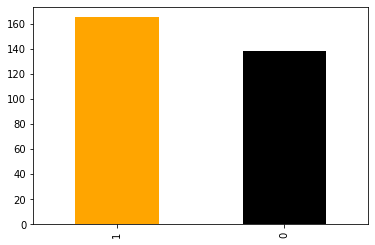

In [5]:
hd["target"].value_counts().plot(kind="bar", color=["orange", "black"]);

In [6]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
#Check for missing values
hd.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease frequency according to sex

In [9]:
hd.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [53]:
#Comparing target column with sex column to determine relation between both
pd.crosstab(hd["target"], hd["sex"])

sex,0,1
target,,
0,24,114
1,72,93


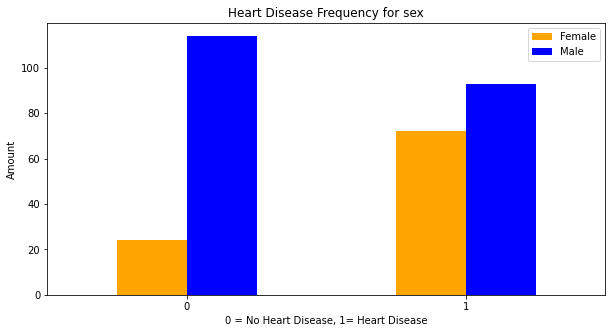

In [11]:
pd.crosstab(hd["target"], hd["sex"]).plot(kind="bar",
                                          figsize=(10,5),
                                          color=["orange","blue"]);

plt.title("Heart Disease Frequency for sex")
plt.xlabel("0 = No Heart Disease, 1= Heart Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

In [12]:
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Age vs Max heart rate for heart disease

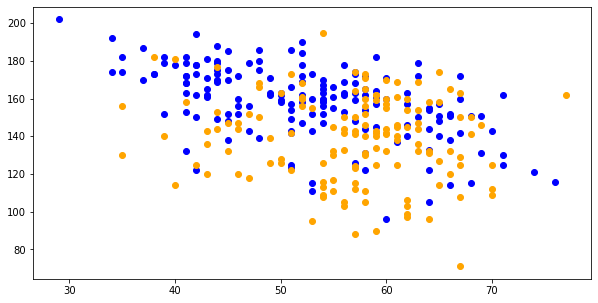

In [13]:
plt.figure(figsize=(10,5))

#Scatter with heart disease
plt.scatter(hd.age[hd.target==1],
            hd.thalach[hd.target==1],
            color="blue")

#Scatter with no heart disease
plt.scatter(hd.age[hd.target==0],
            hd.thalach[hd.target==0],
            color="orange");

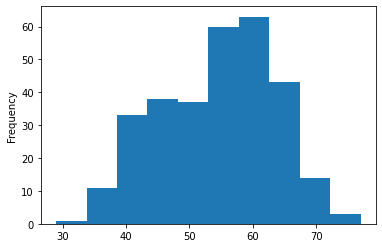

In [14]:
#Check age distribution for outliers
hd.age.plot.hist();

In [15]:
#Corelation Matrix
hd.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


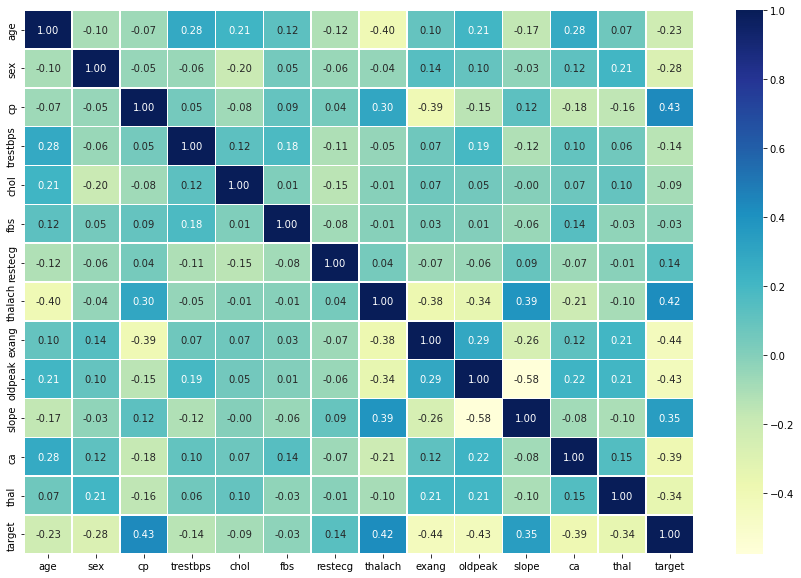

In [16]:
#Visualize the corealtion matrix
corr_matrix = hd.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

## Modelling

In [17]:
#Split data into x and y
x = hd.drop("target", axis=1)
y = hd["target"]

In [18]:
#Split data into train and test sets
np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2)

In [19]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    x_train : training data
    x_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        model.fit(x_train, y_train)
        
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [20]:
model_scores = fit_and_score(models,
                             x_train,
                             x_test,
                             y_train,
                             y_test)

model_scores
                             

F:\ML-Project\end-to-end-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.6885245901639344,
 'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918}

### Hyperparaneter Tuning

In [21]:
#Tuning KNN
train_scores = []
test_scores = []

neighbors = range(1,21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(x_train,y_train)
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))
    

Maximum KNN score on the test data: 75.41%


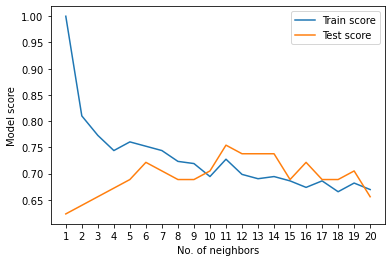

In [22]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("No. of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

### Hyperparameter Tuning using RandomizedSearchCV

In [23]:
#Grid for LogisticRegression
lr_grid = {"C": np.logspace(-4,4,20),
           "solver": ["liblinear"],
           "penalty": ["l2"],
           "multi_class": ["ovr"]}
#Grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [24]:
#Tuning LogisticsRegression
np.random.seed(42)

rs_lr = RandomizedSearchCV(LogisticRegression(),
                           param_distributions=lr_grid,
                           n_iter=20,
                           verbose=True)

#Fitting the model
rs_lr.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'multi_class': ['ovr'],
                                        'penalty': ['l2'],
                                        'solver': ['liblinear']},
                   verbose=True)

In [25]:
rs_lr.best_params_

{'solver': 'liblinear',
 'penalty': 'l2',
 'multi_class': 'ovr',
 'C': 0.23357214690901212}

In [26]:
rs_lr.score(x_test,y_test)

0.8852459016393442

In [27]:
#Tuning RandomForestClassifier
np.random.seed(42)

rs_rfc = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           n_iter=20,
                           verbose=True)

#Fitting the model
rs_rfc.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [28]:
rs_rfc.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [29]:
rs_rfc.score(x_test,y_test)

0.8688524590163934

### Hyperparameter Tuning using GridSearchCV

In [30]:
#Tuning LogisticRgression
gs_lr = GridSearchCV(LogisticRegression(),
                     param_grid=lr_grid,
                     verbose=True)

gs_lr.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'multi_class': ['ovr'], 'penalty': ['l2'],
                         'solver': ['liblinear']},
             verbose=True)

In [31]:
gs_lr.best_params_

{'C': 0.23357214690901212,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'solver': 'liblinear'}

In [32]:
gs_lr.score(x_test,y_test)

0.8852459016393442

### Evaluating Machine Learning Classifier

In [33]:
y_preds = gs_lr.predict(x_test)

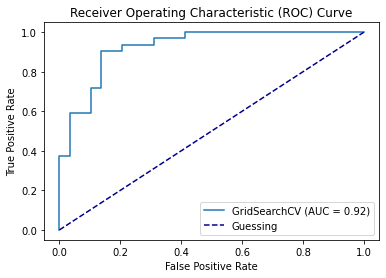

In [34]:
# Plotting ROC and calculating AUC score
plot_roc_curve(gs_lr, x_test, y_test);
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend();

In [35]:
#Confusion Matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


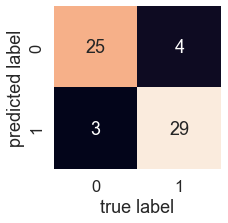

In [36]:
sns.set(font_scale=1.5) 

def plot_confmat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, 
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_confmat(y_test, y_preds)

In [37]:
#Classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculating Evaluation metrics using cross validation

In [38]:
gs_lr.best_params_

{'C': 0.23357214690901212,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'solver': 'liblinear'}

In [39]:
clf = LogisticRegression(C=0.23357214690901212,
                         multi_class='ovr',
                         penalty= 'l2',
                         solver='liblinear')

In [40]:
#Cross validated accuracy
cv_acc = cross_val_score(clf,
                         x,
                         y, 
                         scoring="accuracy") 
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [41]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [42]:
#Cross validated precision
cv_precision = cross_val_score(clf,
                         x,
                         y, 
                         scoring="precision") 

cv_precision = np.mean(cv_precision)
cv_precision

0.8215873015873015

In [43]:
#Cross validated recall
cv_recall = cross_val_score(clf,
                         x,
                         y, 
                         scoring="recall") 

cv_recall = np.mean(cv_recall)
cv_recall

0.9272727272727274

In [44]:
#Cross validated f1
cv_f1 = cross_val_score(clf,
                         x,
                         y, 
                         scoring="f1") 

cv_f1 = np.mean(cv_f1)
cv_f1

0.8705403543192143

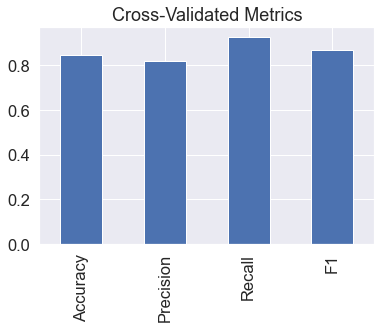

In [45]:
#Visualizing cross validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                            index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", 
                      legend=False,
                      );

### Feature Importance

In [46]:
clf.fit(x_train, y_train)
clf.coef_

array([[ 0.00369922, -0.90424085,  0.67472828, -0.0116134 , -0.00170364,
         0.04787689,  0.33490184,  0.02472939, -0.63120401, -0.57590906,
         0.47095113, -0.65165351, -0.699842  ]])

In [47]:
#Matching features to columns
features_dict = dict(zip(hd.columns, list(clf.coef_[0])))
features_dict

{'age': 0.003699218314634231,
 'sex': -0.9042408481315317,
 'cp': 0.6747282826858118,
 'trestbps': -0.011613404239724763,
 'chol': -0.0017036448048050072,
 'fbs': 0.04787689050301493,
 'restecg': 0.33490183888358416,
 'thalach': 0.024729385199310817,
 'exang': -0.6312040056168838,
 'oldpeak': -0.5759090611742839,
 'slope': 0.47095113183576787,
 'ca': -0.6516535125690047,
 'thal': -0.6998419969792693}

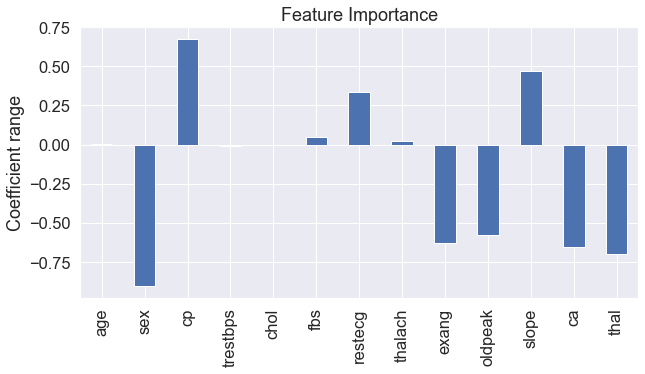

In [48]:
#Visualizing FI
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance",
                       ylabel="Coefficient range",
                       legend=False, 
                       figsize=(10,5));


In [49]:
from sklearn.metrics import accuracy_score
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.
    """
    accuracy = accuracy_score(y_test, y_preds)
    precision = precision_score(y_test, y_preds)
    recall = recall_score(y_test, y_preds)
    f1 = f1_score(y_test, y_preds)
    metric_dict = {"accuracy": (accuracy),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision*100:.2f}")
    print(f"Recall: {recall*100:.2f}")
    print(f"F1 score: {f1*100:.2f}")

    return metric_dict

In [50]:
#Saving and loading model
from joblib import dump, load

dump(gs_lr, filename="gs_logistic_regression.joblib") 

['gs_logistic_regression.joblib']

In [51]:
#Loading the saved model
loaded_joblib_model = load(filename="gs_logistic_regression.joblib")

In [52]:
#Make predictions and evaluate the model
joblib_y_preds = loaded_joblib_model.predict(x_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 88.52%
Precision: 87.88
Recall: 90.62
F1 score: 89.23


{'accuracy': 0.8852459016393442, 'precision': 0.88, 'recall': 0.91, 'f1': 0.89}